# Máster Universitario en Lógica, Computación e Inteligencia Artificial
## Aprendizaje Automático
### Cuestionario 6

Germán Lorenz Vieta<br>

Última actualización: 13 de febrero de 2022

Analizaremos el conjunto de datos sobre el vino que puede obtenerse en el repositorio de la Universidad de California. Estos datos se pueden descargar en el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/). 

Los datos son el resultado de análisis químicos hechos a vinos cultivados en Italia en distintos cultivos. El análisis se separó en 13 componentes que determinan a los vinos según tres tipos. Los atributos son:

* Alcohol
* Ácido málico
* Ceniza
* Alcalinidad de la ceniza
* Magnesio
* Fenoles totales
* Flavonoides
* Fenoles no flavonoides
* Proantocianinas
* Intensidad del color
* Tono
* DO280/OD315 de los vinos diluidos
* Prolina

Cargamos los datos con la libreria *scikit learn* ya que se encuentran alli directamente omitiendo hacerlo desde la UCI.

In [1]:
from sklearn.datasets import load_wine
wine = load_wine()

Los datos tienen 178 muestras y 13 componentes:

In [2]:
wine.data.shape

(178, 13)

Observemos los mismos para detectar que hay 178 muestras de 13 componentes que nos dan 3 clases de vinos distintos.

In [3]:
print("Valores de clasificación:\n {}".format(wine['target']))
print("Nombres de los valores de clasificación: {}".format(wine['target_names'])) 
print("Atributos: {}".format(wine['feature_names']))

Valores de clasificación:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Nombres de los valores de clasificación: ['class_0' 'class_1' 'class_2']
Atributos: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


Veamos algunos ejemplos de datos para asegurarnos:

In [4]:
wine.data[23:27]

array([[1.285e+01, 1.600e+00, 2.520e+00, 1.780e+01, 9.500e+01, 2.480e+00,
        2.370e+00, 2.600e-01, 1.460e+00, 3.930e+00, 1.090e+00, 3.630e+00,
        1.015e+03],
       [1.350e+01, 1.810e+00, 2.610e+00, 2.000e+01, 9.600e+01, 2.530e+00,
        2.610e+00, 2.800e-01, 1.660e+00, 3.520e+00, 1.120e+00, 3.820e+00,
        8.450e+02],
       [1.305e+01, 2.050e+00, 3.220e+00, 2.500e+01, 1.240e+02, 2.630e+00,
        2.680e+00, 4.700e-01, 1.920e+00, 3.580e+00, 1.130e+00, 3.200e+00,
        8.300e+02],
       [1.339e+01, 1.770e+00, 2.620e+00, 1.610e+01, 9.300e+01, 2.850e+00,
        2.940e+00, 3.400e-01, 1.450e+00, 4.800e+00, 9.200e-01, 3.220e+00,
        1.195e+03]])

Ahora comencemos a analizar con panda. Veamos cómo se distribuyen gráficamente con *scatter_matrix*:

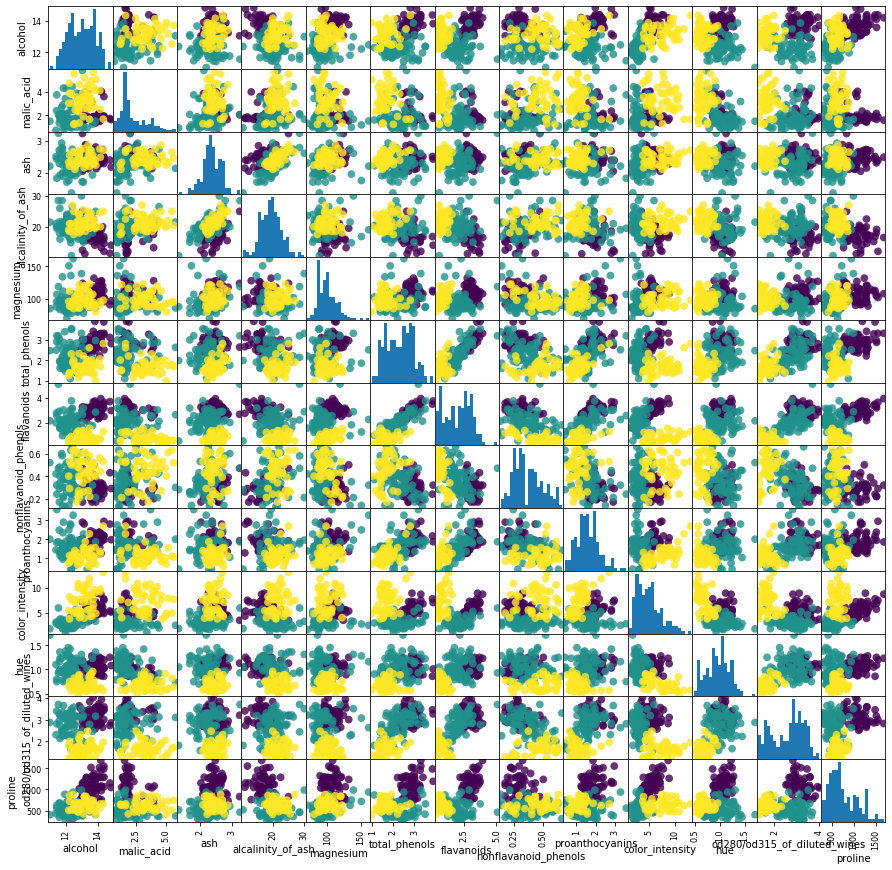

In [5]:
import pandas as pd

wine_dataframe = pd.DataFrame(wine.data, columns=wine.feature_names)
sp = pd.plotting.scatter_matrix(wine_dataframe, c=wine.target, figsize=(15, 15), marker='o',
                                 hist_kwds={'bins': 20}, s=60, alpha=.8)

Se puede observar una interesante separación entre los puntos morados con los azules y amarillos, pero solo en algunos atributos. Para verlo con más detalle veamos el *coeficiente de correlación de Pearson*:

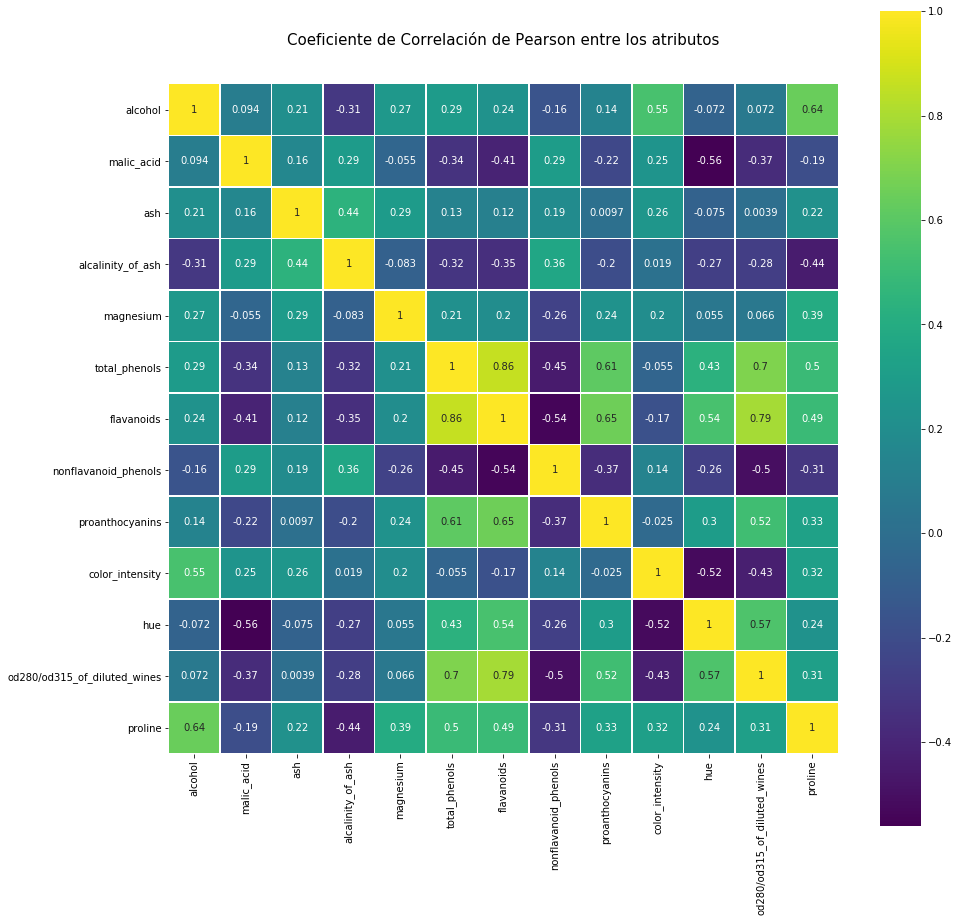

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
plt.title('Coeficiente de Correlación de Pearson entre los atributos', y=1.05, size=15)
sns.heatmap(wine_dataframe.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='viridis', linecolor='white', annot=True)

Obtuvimos una alta correlación entre Flavonoides y DO280/OD315 de los vinos diluidos o entre Flavonoides y Fenoles no flavonoides.

Para hacer mas interesante el análisis veamos una representación en 3D para intentar obtener información sobre los *outliers*.

<Figure size 432x288 with 0 Axes>

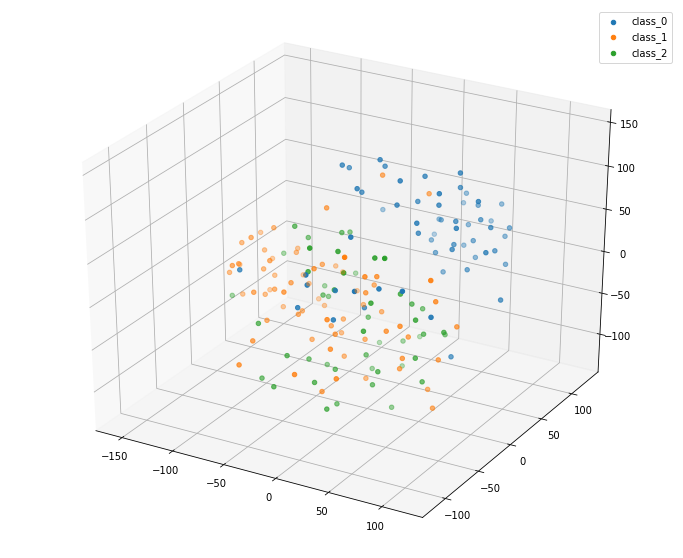

In [7]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

tsne_3d = TSNE(n_components=3, random_state=10, perplexity=25.0)

X_3d = tsne_3d.fit_transform(wine.data)
target_ids = range(len(wine.target_names))

fig = plt.figure()
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

for i, label in zip(target_ids, wine.target_names):
    ax.scatter(X_3d[wine.target == i, 0], X_3d[wine.target == i, 1],X_3d[wine.target == i, 2],label=label)

plt.legend()
plt.show()

La dispersión de los datos es alta. Esto no nos permite ver si hay valores atípicos que podríamos quitar con algún umbral así que analicemos con los *boxplots*:

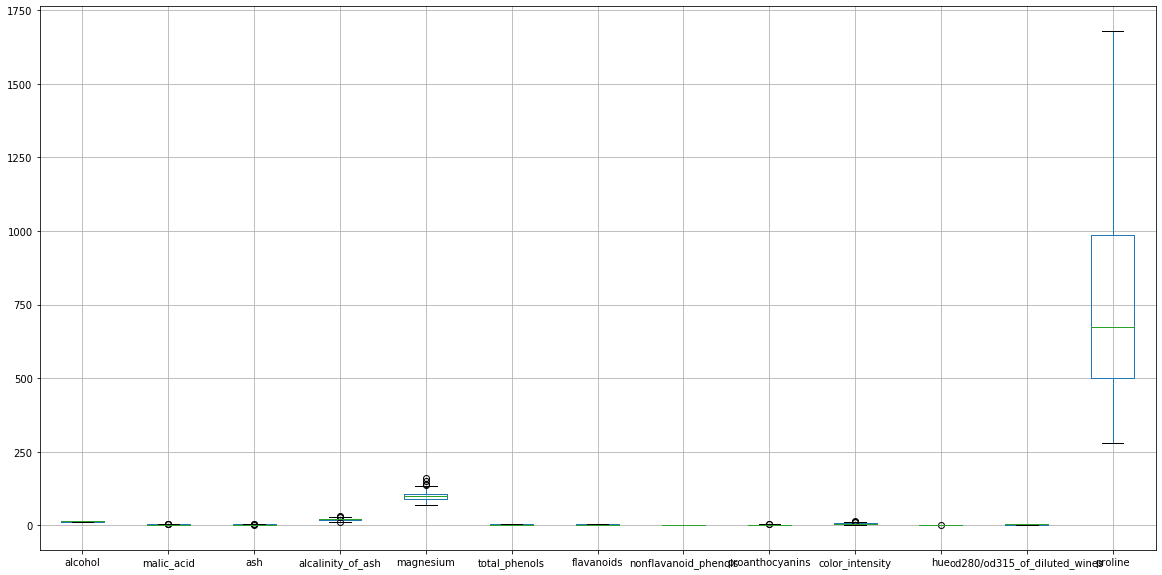

In [8]:
plt.figure(figsize=(20,10))
wine_dataframe.boxplot()

Efectivamente hay dispersión en la Prolina. Considerando que los demás datos no presentas valores atípicos seguiré el estudio con todo el conjunto de datos. Hay que reconocer que si hubiera varios datos atípicos habría que fijar un umbral y luego quitar aquellos que no cumplan las condiciones como por ejemplo usando un *z_score* de nuestra base de datos:

In [9]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(wine_dataframe))

Antes de empezar a procesar los datos hay que hacer un preprocesamiento para normalizarlos:

In [10]:
from sklearn import preprocessing
X_wine = preprocessing.normalize(wine.data)

Clasificamos con *one-hot* las etiquetas:

In [11]:
onehot_encoder = preprocessing.OneHotEncoder(sparse=False)
y_reshaped = wine.target.reshape(-1, 1)
y_wine = onehot_encoder.fit_transform(y_reshaped)
y_wine[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

Ahora dividiremos el conjunto de datos normalizado en conjunto de entrenamiento y prueba. Usaremos el 75% de los datos para entrenar el modelo y el 25% restante para evaluarlo.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, 
                                                    random_state=22,test_size=0.25)

Observemos como quedaron los datos:

In [13]:
X_train[0],y_train[0]

(array([0.02483405, 0.00720592, 0.00481566, 0.04305974, 0.1687239 ,
        0.00360296, 0.00133573, 0.00098422, 0.00237268, 0.01616937,
        0.0010721 , 0.00281206, 0.98422273]),
 array([0., 0., 1.]))

El módulo para trabajar que usaremos en scikit_learn es `neural_network`, y dentro del mismo `MLPClassifier` que nos permitirá usar las redes multicapa hacia adelante. Nosotros con ello construiremos nuestra red neuronal y entrenaremos el modelo con nuestros datos de entrenamiento y dejando los parámetros por defecto, excepto el número de iteraciones que tenemos que aumentarlo para que el algoritmo converja.

In [14]:
from sklearn.neural_network import MLPClassifier
mlp_wine = MLPClassifier(max_iter=10000, random_state=22)
mlp_wine.fit(X_train, y_train)
scores_mlp_wine = mlp_wine.score(X_test,y_test)

Veamos la medida de rendimiento de la red que hemos construido:

In [15]:
print("Rendimiento en el conjunto de entrenamiento: ",mlp_wine.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba: ",mlp_wine.score(X_test,y_test))
print("Rendimiento en el conjunto total: ",mlp_wine.score(X_wine,y_wine))

Rendimiento en el conjunto de entrenamiento:  0.924812030075188
Rendimiento en el conjunto de prueba:  0.8666666666666667
Rendimiento en el conjunto total:  0.9101123595505618


Ahora, según lo solicitado en el estudio necesitamos analizar el número de capas, la optimización de capas, el factor de aprendizaje, el tamaño de batch, la función de activación y otros factores para descubrir un modelo superador. Veamos:

#### Número de capas

En primer lugar, vamos a definir como sistema de optimización LBFGS (optimizador de la familia de los métodos cuasi-Newton) ya que usualmente converge mejor con conjuntos de datos pequeños ya que la dimensión de su matriz hessiana no será tan grande. Para nuestro conjunto de datos elegiremos una capa oculta con 100 unidades (parámetro por defecto). Luego probaremos otras configuraciones:

In [16]:
def layers_test(capas):
    model = MLPClassifier(solver='lbfgs',max_iter=10000, random_state=0, hidden_layer_sizes=capas)
    model.fit(X_train, y_train)
    print("Rendimiento en el conjunto de entrenamiento: ",model.score(X_train,y_train))
    print("Rendimiento en el conjunto de prueba: ",model.score(X_test,y_test))
    print("Rendimiento en el conjunto total: ",model.score(X_wine,y_wine))
    return model.score(X_wine,y_wine)

Veamos una sola capa con 100 unidades:

In [17]:
layers_test((100,))

Rendimiento en el conjunto de entrenamiento:  0.7969924812030075
Rendimiento en el conjunto de prueba:  0.6666666666666666
Rendimiento en el conjunto total:  0.7640449438202247


0.7640449438202247

Intentemos probar distintas configuraciones con un tamaño mayor número de unidades:

In [18]:
eval_data = []
for x in range (10,120,5):
    model = MLPClassifier(solver='lbfgs',max_iter=10000, random_state=0, hidden_layer_sizes=x)
    model.fit(X_train, y_train)
    eval_data.append([x, model.score(X_wine,y_wine)])
    print("Rendimiento en el conjunto total: ",model.score(X_wine,y_wine)," con ",x, " tamaño en capa oculta")

Rendimiento en el conjunto total:  0.6629213483146067  con  10  tamaño en capa oculta
Rendimiento en el conjunto total:  0.3595505617977528  con  15  tamaño en capa oculta
Rendimiento en el conjunto total:  0.7191011235955056  con  20  tamaño en capa oculta
Rendimiento en el conjunto total:  0.1853932584269663  con  25  tamaño en capa oculta
Rendimiento en el conjunto total:  0.8707865168539326  con  30  tamaño en capa oculta
Rendimiento en el conjunto total:  0.9382022471910112  con  35  tamaño en capa oculta
Rendimiento en el conjunto total:  0.848314606741573  con  40  tamaño en capa oculta
Rendimiento en el conjunto total:  0.9101123595505618  con  45  tamaño en capa oculta
Rendimiento en el conjunto total:  0.9269662921348315  con  50  tamaño en capa oculta
Rendimiento en el conjunto total:  0.9382022471910112  con  55  tamaño en capa oculta
Rendimiento en el conjunto total:  0.9269662921348315  con  60  tamaño en capa oculta
Rendimiento en el conjunto total:  0.5674157303370787  

Parece que a medida que aumentamos el número de unidades mejora el resultado hasta un punto donde la cantidad de layers en la capa oculta empeora el aprendizaje:

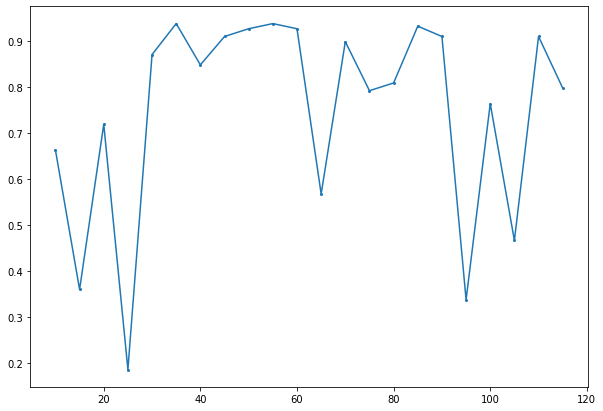

In [19]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
numero_capa = []
eval_capa = []
for x in range(len(eval_data)): numero_capa.append(eval_data[x][0])
for x in range(len(eval_data)): eval_capa.append(eval_data[x][1])
plt.figure(figsize=(10,7))
plt.plot(numero_capa, eval_capa,'o',markersize=2, LineStyle="-")
plt.show()

Definamos una función para analizar lo anterior, pero optimizando con ADAM ya que a pesar de ser un método de primer orden tiene la ventaja de actuar como de segundo orden con una estimación más fuerte por dimensión:

In [20]:
def layers_test_adam(capas):
    model = MLPClassifier(solver='adam',max_iter=10000, random_state=0, hidden_layer_sizes=capas)
    model.fit(X_train, y_train)
    print("Rendimiento en el conjunto de entrenamiento: ",model.score(X_train,y_train))
    print("Rendimiento en el conjunto de prueba: ",model.score(X_test,y_test))
    print("Rendimiento en el conjunto total: ",model.score(X_wine,y_wine))   

Probemos con 100 unidades:

In [21]:
layers_test_adam((100,)) 

Rendimiento en el conjunto de entrenamiento:  0.924812030075188
Rendimiento en el conjunto de prueba:  0.8666666666666667
Rendimiento en el conjunto total:  0.9101123595505618


Intentemos probar distintas configuraciones con un tamaño mayor número de unidades:

Rendimiento en el conjunto total:  0.8932584269662921  con  10  tamaño en capa oculta
Rendimiento en el conjunto total:  0.8202247191011236  con  15  tamaño en capa oculta
Rendimiento en el conjunto total:  0.8932584269662921  con  20  tamaño en capa oculta
Rendimiento en el conjunto total:  0.8764044943820225  con  25  tamaño en capa oculta
Rendimiento en el conjunto total:  0.8820224719101124  con  30  tamaño en capa oculta
Rendimiento en el conjunto total:  0.898876404494382  con  35  tamaño en capa oculta
Rendimiento en el conjunto total:  0.8932584269662921  con  40  tamaño en capa oculta
Rendimiento en el conjunto total:  0.8820224719101124  con  45  tamaño en capa oculta
Rendimiento en el conjunto total:  0.8820224719101124  con  50  tamaño en capa oculta
Rendimiento en el conjunto total:  0.8932584269662921  con  55  tamaño en capa oculta
Rendimiento en el conjunto total:  0.8932584269662921  con  60  tamaño en capa oculta
Rendimiento en el conjunto total:  0.9044943820224719  

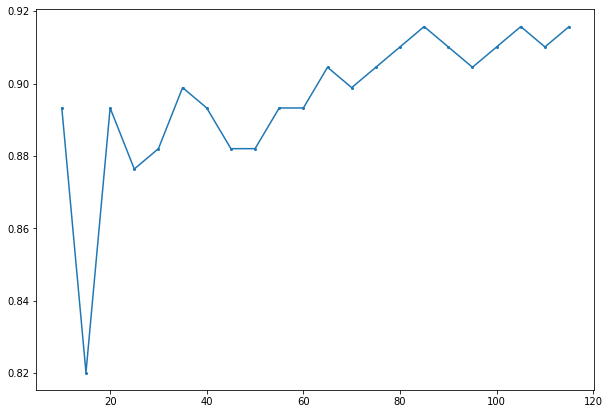

In [22]:
eval_data = []
for x in range (10,120,5):
    model = MLPClassifier(solver='adam',max_iter=10000, random_state=0, hidden_layer_sizes=x)
    model.fit(X_train, y_train)
    eval_data.append([x, model.score(X_wine,y_wine)])
    print("Rendimiento en el conjunto total: ",model.score(X_wine,y_wine)," con ",x, " tamaño en capa oculta")
numero_capa = []
eval_capa = []
for x in range(len(eval_data)): numero_capa.append(eval_data[x][0])
for x in range(len(eval_data)): eval_capa.append(eval_data[x][1])
plt.figure(figsize=(10,7))
plt.plot(numero_capa, eval_capa,'o',markersize=2, LineStyle="-")
plt.show()

Podemos apreciar que ADAM es más estable y con los datos ya alcanza un buen rendimiento con solo 20 unidades. Por otro lado, LFGS toma ventaja con 35 unidades. De momento nos quedaremos con esta última configuración.

In [23]:
layers_test(35)

Rendimiento en el conjunto de entrenamiento:  0.9548872180451128
Rendimiento en el conjunto de prueba:  0.8888888888888888
Rendimiento en el conjunto total:  0.9382022471910112


0.9382022471910112

Analicemos ahora si agregar más capas ocultas mejora los resultados previamente obtenidos probando combinaciones con primera capa entre 10 a 30 unidades, segunda capa entre 10 a 30 unidades y 65 unidades en la última capa con saltos de 2 unidades por ciclo:

In [24]:
eval_multilayer = []
for i in range (10, 40, 2):
    for j in range (10, 40, 2):
        eval_multilayer.append([i,j,65])
print (eval_multilayer)

for case in eval_multilayer:
    print (case[0],case[1],case[2])
    case.append(layers_test((case[0],case[1],case[2],)))

[[10, 10, 65], [10, 12, 65], [10, 14, 65], [10, 16, 65], [10, 18, 65], [10, 20, 65], [10, 22, 65], [10, 24, 65], [10, 26, 65], [10, 28, 65], [10, 30, 65], [10, 32, 65], [10, 34, 65], [10, 36, 65], [10, 38, 65], [12, 10, 65], [12, 12, 65], [12, 14, 65], [12, 16, 65], [12, 18, 65], [12, 20, 65], [12, 22, 65], [12, 24, 65], [12, 26, 65], [12, 28, 65], [12, 30, 65], [12, 32, 65], [12, 34, 65], [12, 36, 65], [12, 38, 65], [14, 10, 65], [14, 12, 65], [14, 14, 65], [14, 16, 65], [14, 18, 65], [14, 20, 65], [14, 22, 65], [14, 24, 65], [14, 26, 65], [14, 28, 65], [14, 30, 65], [14, 32, 65], [14, 34, 65], [14, 36, 65], [14, 38, 65], [16, 10, 65], [16, 12, 65], [16, 14, 65], [16, 16, 65], [16, 18, 65], [16, 20, 65], [16, 22, 65], [16, 24, 65], [16, 26, 65], [16, 28, 65], [16, 30, 65], [16, 32, 65], [16, 34, 65], [16, 36, 65], [16, 38, 65], [18, 10, 65], [18, 12, 65], [18, 14, 65], [18, 16, 65], [18, 18, 65], [18, 20, 65], [18, 22, 65], [18, 24, 65], [18, 26, 65], [18, 28, 65], [18, 30, 65], [18, 

Observemos todos los datos obtenidos para tener una mejor apreciación de los modelos entrenados con las distintas configuraciones:

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

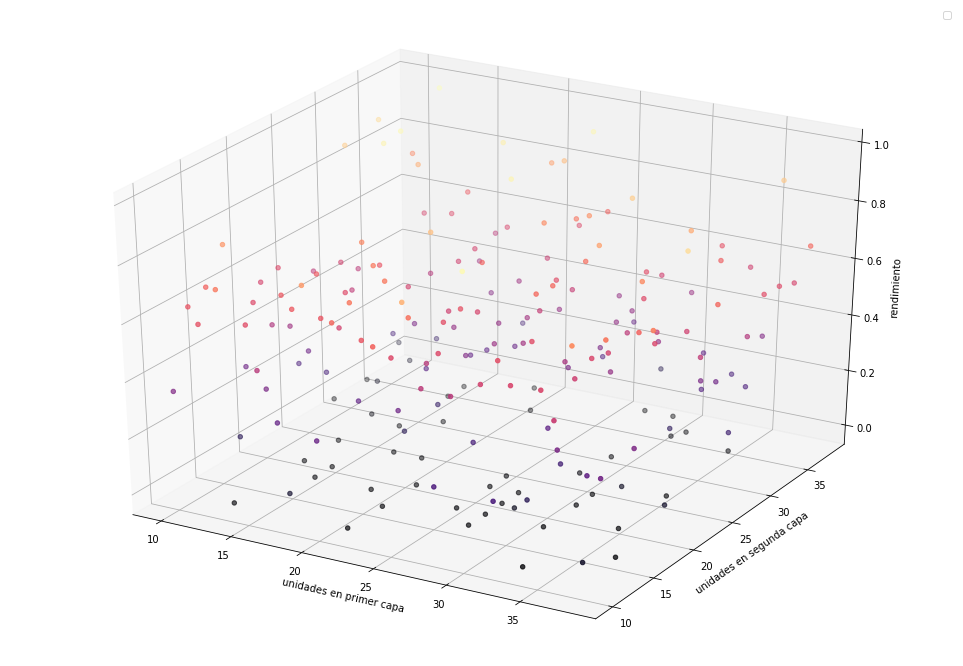

In [25]:
eval_multilayer_x = []
eval_multilayer_y = []
eval_multilayer_z = []
for x in range(len(eval_multilayer)): eval_multilayer_x.append(eval_multilayer[x][0])
for x in range(len(eval_multilayer)): eval_multilayer_y.append(eval_multilayer[x][1])
for x in range(len(eval_multilayer)): eval_multilayer_z.append(eval_multilayer[x][3])
fig = plt.figure()
fig = plt.figure(figsize=(17,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(eval_multilayer_x,eval_multilayer_y,eval_multilayer_z, c=eval_multilayer_z, cmap=plt.cm.magma)
ax.set_xlabel('unidades en primer capa')
ax.set_ylabel('unidades en segunda capa')
ax.set_zlabel('rendimiento')
plt.legend()
plt.show()


Ordenemos los modelos para obtener los mejores:

In [27]:
np.set_printoptions(suppress=True)
eval_multilayer = np.array(eval_multilayer)
eval_multilayer = eval_multilayer[np.argsort(eval_multilayer[:, 3])]
eval_multilayer

array([[16.        , 16.        , 65.        ,  0.        ],
       [14.        , 18.        , 65.        ,  0.        ],
       [14.        , 22.        , 65.        ,  0.        ],
       [32.        , 34.        , 65.        ,  0.        ],
       [32.        , 22.        , 65.        ,  0.        ],
       [32.        , 20.        , 65.        ,  0.        ],
       [22.        , 10.        , 65.        ,  0.        ],
       [32.        , 16.        , 65.        ,  0.        ],
       [26.        , 22.        , 65.        ,  0.        ],
       [16.        , 18.        , 65.        ,  0.        ],
       [26.        , 16.        , 65.        ,  0.        ],
       [16.        , 26.        , 65.        ,  0.        ],
       [30.        , 36.        , 65.        ,  0.        ],
       [16.        , 32.        , 65.        ,  0.        ],
       [16.        , 34.        , 65.        ,  0.        ],
       [30.        , 28.        , 65.        ,  0.        ],
       [28.        , 36.

Luego del análisis encontramos que el modelo de una sola capa con 35 unidades es extremadamente eficiente. Por otro lado, los 3 mejores modelos encontrados tienen la siguiente configuración:

[35, Rendimiento = 0.93820224]

[30, 10, 65, Rendimiento = 0.96067416]

[14, 30, 65, Rendimiento = 0.96067416]

[12, 38, 65, Rendimiento = 0.97191011]

#### Factor de aprendizaje
En este apartado vamos a estudiar la importancia de *learning_rate* para nuestro análisis. Esta tasa puede tomar los valores *constant* (se mantiene constante), *invscaling* (disminuye en cada caso de tiempo) o *adaptive* (constante siempre que la pérdida de entrenamiento siga disminuyendo). Estas especificaciones dependen del valor dado en *learning_rate_init* que controla el tamaño del paso al actualizar los pesos y solo se usan para `solver='sgd'`. Probemos cada posibilidad con los mejores 3 modelos obtenidos anteriormente:



In [28]:
def learning_testing(factor, rate_init, layers):
    model = MLPClassifier(solver='sgd',max_iter=10000, random_state=41, 
                          hidden_layer_sizes=layers,learning_rate=factor,learning_rate_init=rate_init)
    model.fit(X_train, y_train)
    print("Rendimiento en el conjunto de entrenamiento: ",model.score(X_train,y_train))
    print("Rendimiento en el conjunto de prueba: ",model.score(X_test,y_test))
    print("Rendimiento en el conjunto total: ",model.score(X_wine,y_wine))

Probemos constant

In [29]:
learning_testing('constant',0.045, (35,))
learning_testing('constant',0.045, (30,10,65,))
learning_testing('constant',0.045, (14,30,65,))
learning_testing('constant',0.045, (12,38,65,))

Rendimiento en el conjunto de entrenamiento:  0.5714285714285714
Rendimiento en el conjunto de prueba:  0.5111111111111111
Rendimiento en el conjunto total:  0.5561797752808989
Rendimiento en el conjunto de entrenamiento:  0.0
Rendimiento en el conjunto de prueba:  0.0
Rendimiento en el conjunto total:  0.0
Rendimiento en el conjunto de entrenamiento:  0.2631578947368421
Rendimiento en el conjunto de prueba:  0.28888888888888886
Rendimiento en el conjunto total:  0.2696629213483146
Rendimiento en el conjunto de entrenamiento:  0.20300751879699247
Rendimiento en el conjunto de prueba:  0.17777777777777778
Rendimiento en el conjunto total:  0.19662921348314608


Probemos invscaling

In [30]:
learning_testing('invscaling',0.01, (35,))
learning_testing('invscaling',0.01, (30,10,65,))
learning_testing('invscaling',0.01, (14,30,65,))
learning_testing('invscaling',0.01, (12,38,65,))

Rendimiento en el conjunto de entrenamiento:  0.40601503759398494
Rendimiento en el conjunto de prueba:  0.37777777777777777
Rendimiento en el conjunto total:  0.398876404494382
Rendimiento en el conjunto de entrenamiento:  0.0
Rendimiento en el conjunto de prueba:  0.0
Rendimiento en el conjunto total:  0.0
Rendimiento en el conjunto de entrenamiento:  0.0
Rendimiento en el conjunto de prueba:  0.0
Rendimiento en el conjunto total:  0.0
Rendimiento en el conjunto de entrenamiento:  0.3458646616541353
Rendimiento en el conjunto de prueba:  0.28888888888888886
Rendimiento en el conjunto total:  0.33146067415730335


Probamos adaptive

In [31]:
learning_testing('adaptive',0.045, (35,))
learning_testing('adaptive',0.045, (30,10,65,))
learning_testing('adaptive',0.045, (14,30,65,))
learning_testing('adaptive',0.045, (12,38,65,))

Rendimiento en el conjunto de entrenamiento:  0.5714285714285714
Rendimiento en el conjunto de prueba:  0.5111111111111111
Rendimiento en el conjunto total:  0.5561797752808989
Rendimiento en el conjunto de entrenamiento:  0.0
Rendimiento en el conjunto de prueba:  0.0
Rendimiento en el conjunto total:  0.0
Rendimiento en el conjunto de entrenamiento:  0.5639097744360902
Rendimiento en el conjunto de prueba:  0.5333333333333333
Rendimiento en el conjunto total:  0.5561797752808989
Rendimiento en el conjunto de entrenamiento:  0.5714285714285714
Rendimiento en el conjunto de prueba:  0.5333333333333333
Rendimiento en el conjunto total:  0.5617977528089888


De las pruebas realizadas se obtuvo que:
- constant no se adapta a modelos más profundos y los modelos tienden a no mejorar su rendimiento
- invscaling no favorece el aprendizaje en los modelos seleccionados
- adaptative permite mejorar el rendimiento, pero las opciones evaluadas anteriormente son superadoras

#### Tamaño de batch
En este apartado se va a estudiar el tamaño del *batch*, esto nos permite ajustar el número de ejemplos que se quieren tomar juntos antes de modificar los pesos. Por defecto se toma el valor automático `min(200, n_samples)`. Veamos que ocurre si variamos este valor:

In [32]:
def batch_testing (batch_sizes, layer):
    test_prec = []
    train_prec = []
    for sizes in batch_sizes:
        model = MLPClassifier(solver='lbfgs',max_iter=10000, random_state=0, hidden_layer_sizes=layer, batch_size=sizes)
        model.fit(X_train, y_train)
        train_prec.append(model.score(X_train,y_train))
        test_prec.append(model.score(X_test, y_test))
    return train_prec, test_prec

Probemos con los modelos multicapa :

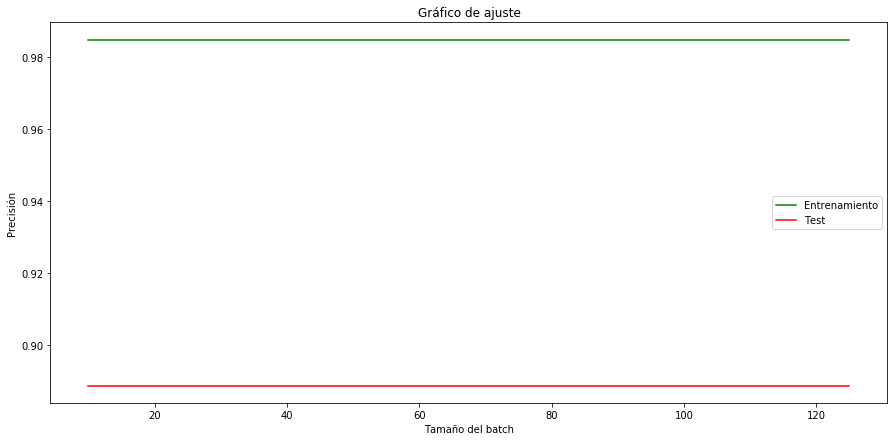

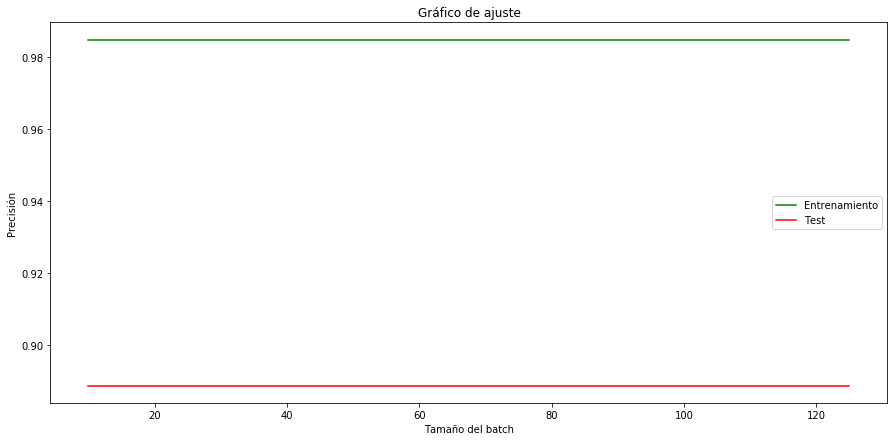

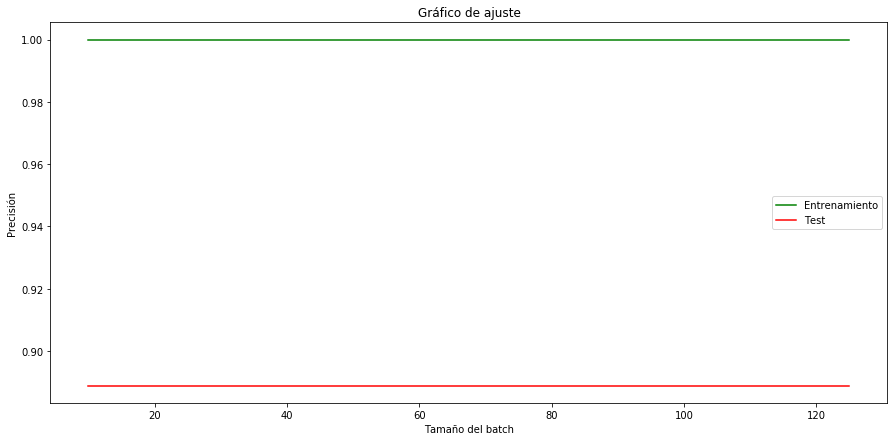

In [33]:
batch_sizes = list(range(10, 130, 5))
best_multilayer = eval_multilayer[-3:].astype(int) 
for model in best_multilayer:
    layer = (model[0],model[1], model[2])
    train_prec, test_prec = batch_testing (batch_sizes, layer)
    plt.figure(figsize=(15,7))   
    plt.plot(batch_sizes, train_prec, color='green', label='Entrenamiento')
    plt.plot(batch_sizes, test_prec, color='red', label='Test')
    plt.title('Gráfico de ajuste')
    plt.legend()
    plt.ylabel('Precisión')
    plt.xlabel('Tamaño del batch')
    plt.show()

Podemos verificar que para el modelo tratado la estrategia de batchs no genera una mejora considerable en los casos evaluados

#### Función de activación
En este apartado se va a estudiar la función de activación para la capa oculta. Los valores que puede tomar son:

* *identity*: activación sin operación, devuelve $f(x) = x$
* *logistic*: función sigmoide, devuelve $f (x) = \frac{1}{1 + e^{-x}}$
* *tanh*: función tangente hiperbólica, devuelve $f(x) = tanh(x)$
* *relu*: función de unidad lineal, devuelve $f(x) = max(0, x)$

In [34]:
def activation_function_testing(activacion, layer):
    model = MLPClassifier(solver='lbfgs',max_iter=10000, random_state=0,hidden_layer_sizes=layer,activation = activacion)
    model.fit(X_train, y_train)
    print("Rendimiento en el conjunto de entrenamiento: ",model.score(X_train,y_train))
    print("Rendimiento en el conjunto de prueba: ",model.score(X_test,y_test))
    print("Rendimiento en el conjunto total: ",model.score(X_wine,y_wine))
    return model.score(X_wine,y_wine)

Probemos nuestros 3 mejores modelos multicapa con las distintas funciones de activación:

In [35]:
activations = ["identity","logistic","tanh", "relu"]
best_multilayer_models = np.array(eval_multilayer[-3:])
best_multilayer_activations = []
for model in best_multilayer_models:
    best_multilayer_activations.append([int(model[0]),int(model[1]), int(model[2])])
    for activation in activations:
        layer = (int(model[0]),int(model[1]), int(model[2]))
        best_multilayer_activations[-1].extend([activation_function_testing (activation, layer)])

Rendimiento en el conjunto de entrenamiento:  0.06766917293233082
Rendimiento en el conjunto de prueba:  0.044444444444444446
Rendimiento en el conjunto total:  0.06179775280898876
Rendimiento en el conjunto de entrenamiento:  0.0
Rendimiento en el conjunto de prueba:  0.0
Rendimiento en el conjunto total:  0.0
Rendimiento en el conjunto de entrenamiento:  1.0
Rendimiento en el conjunto de prueba:  0.8666666666666667
Rendimiento en el conjunto total:  0.9662921348314607
Rendimiento en el conjunto de entrenamiento:  0.9849624060150376
Rendimiento en el conjunto de prueba:  0.8888888888888888
Rendimiento en el conjunto total:  0.9606741573033708
Rendimiento en el conjunto de entrenamiento:  0.6090225563909775
Rendimiento en el conjunto de prueba:  0.5333333333333333
Rendimiento en el conjunto total:  0.5898876404494382
Rendimiento en el conjunto de entrenamiento:  0.0
Rendimiento en el conjunto de prueba:  0.0
Rendimiento en el conjunto total:  0.0
Rendimiento en el conjunto de entrenami

Probemos el modelo de 35 unidades solamente también:

In [36]:
activations = ["identity","logistic","tanh", "relu"]
una_capa = []
for activation in activations:
    una_capa.append(activation_function_testing (activation, (35),))

Rendimiento en el conjunto de entrenamiento:  1.0
Rendimiento en el conjunto de prueba:  0.8444444444444444
Rendimiento en el conjunto total:  0.9606741573033708
Rendimiento en el conjunto de entrenamiento:  1.0
Rendimiento en el conjunto de prueba:  0.8666666666666667
Rendimiento en el conjunto total:  0.9662921348314607
Rendimiento en el conjunto de entrenamiento:  1.0
Rendimiento en el conjunto de prueba:  0.8666666666666667
Rendimiento en el conjunto total:  0.9662921348314607
Rendimiento en el conjunto de entrenamiento:  0.9548872180451128
Rendimiento en el conjunto de prueba:  0.8888888888888888
Rendimiento en el conjunto total:  0.9382022471910112


Comparemos toda la información para analizar las funciones de activación:

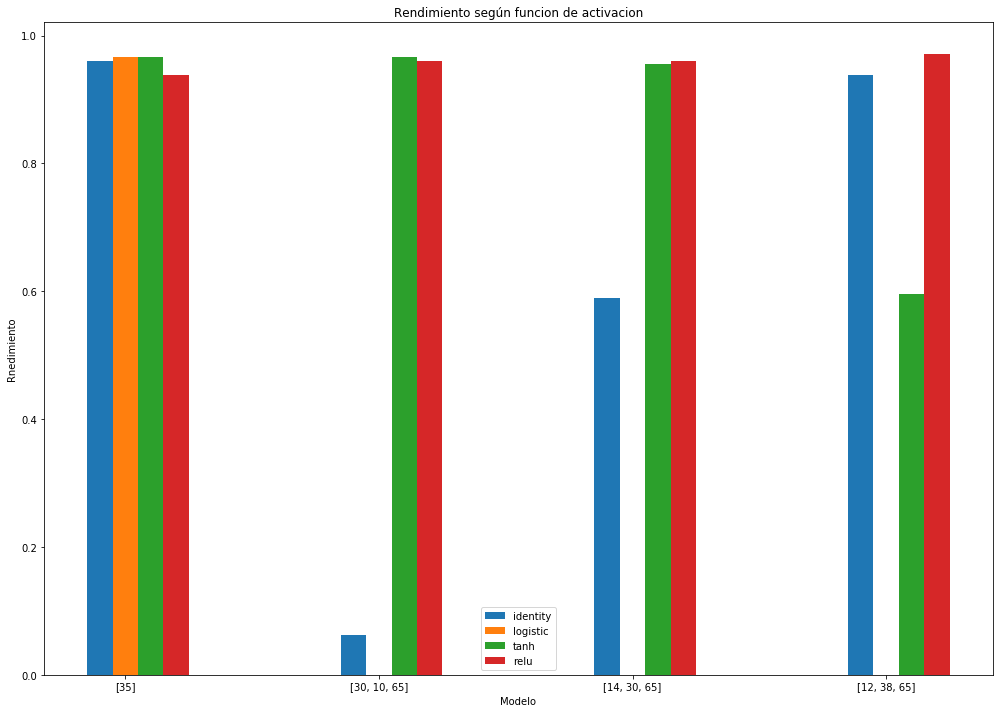

In [37]:
una_capa
serie_1 = []
serie_2 = []
serie_3 = []
serie_4 = []

serie_1.append(una_capa[0])
serie_2.append(una_capa[1])
serie_3.append(una_capa[2])
serie_4.append(una_capa[3])
    
for data in best_multilayer_activations:
    serie_1.append(data[3])
    serie_2.append(data[4])
    serie_3.append(data[5])
    serie_4.append(data[6])

 
numero_de_grupos = len(serie_1)
indice_barras = np.arange(numero_de_grupos)
ancho_barras =0.1

plt.figure(figsize=(17,12))  
plt.bar(indice_barras, serie_1 , width=ancho_barras, label="identity")
plt.bar(indice_barras + ancho_barras, serie_2 , width=ancho_barras, label="logistic")
plt.bar(indice_barras + ancho_barras + ancho_barras, serie_3 , width=ancho_barras, label="tanh")
plt.bar(indice_barras + ancho_barras + ancho_barras + ancho_barras, serie_4 , width=ancho_barras, label="relu")
plt.legend(loc='best')
## Se colocan los indicadores en el eje x
plt.xticks(indice_barras + ancho_barras, (
    [35],
    best_multilayer_activations[0][0:3],
    best_multilayer_activations[1][0:3],
    best_multilayer_activations[2][0:3]))
plt.ylabel('Rnedimiento')
plt.xlabel('Modelo')
plt.title('Rendimiento según funcion de activacion')
plt.show()

Podemos observar que la función de activación *relu* es la que obtiene mejor resultado. Pero los valores obtenidos varían según la configuración de los parámetros estudiados anteriormente. Por lo tanto, se va a hacer un estudio en el que se varían varios parámetros a la vez para buscar la mejor red neuronal. Para ello vamos a usar *GridSearchCV*.

In [38]:
from sklearn.model_selection import GridSearchCV

parameter_space = {
    'hidden_layer_sizes': [(35), (30, 10, 65), (14, 30, 65),(12, 38, 65)],
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'learning_rate_init' : [0.001, 0.01, 0.05, 0.1],
}

clf = GridSearchCV(mlp_wine, parameter_space, n_jobs=-1, cv=3, verbose=10)
clf.fit(X_train, y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   43.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=10000, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_sta...
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [35, (30, 10, 65), (14, 30, 65),
                                         

El mejor modelo es el multicapa [30, 10, 65]. Veamoslo:

In [39]:
print('La mejor medida es {}'.format(clf.best_score_))
print('Y se consigue para los parámetros{}'.format(clf.best_params_))

La mejor medida es 0.9249158249158249
Y se consigue para los parámetros{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (30, 10, 65), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'adam'}


Ahora construyamos el mejor modelo según GridSearchCV

In [40]:
best_model = clf.best_estimator_
best_model.fit(X_train, y_train)
scores_best_model = best_model.score(X_test, y_test)
print('Precisión: {0:.3f}'.format(scores_best_model))

Precisión: 0.911


Ahora veamos al matriz de confusión con dicho modelo

In [41]:
y_pred = best_model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1)))
print(classification_report(y_test, y_pred))

[[12  1  0]
 [ 1 16  0]
 [ 0  1 14]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.89      0.94      0.91        17
           2       1.00      0.93      0.97        15

   micro avg       0.93      0.91      0.92        45
   macro avg       0.94      0.91      0.92        45
weighted avg       0.93      0.91      0.92        45
 samples avg       0.91      0.91      0.91        45



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hay 12 vinos de la clase 0, 16 de la clase 1 y 14 de la clase 2 que son clasificados correctamente. Sin embargo, hay uno de clase 0 clasificado como clase 1, uno de la clase 1 clasificado como clase 0 y uno de la clase 2 clasificados como clase 1.

Por último, veamos la importancia de los pesos en la capa oculta para este último modelo construido. Para ello se usa la siguiente matriz que nos indica mediante colores la intensidad de los distintos pesos de la primera capa oculta, para cada una de las características. Esto nos podría dar una idea del grado de importancia de cada característica:

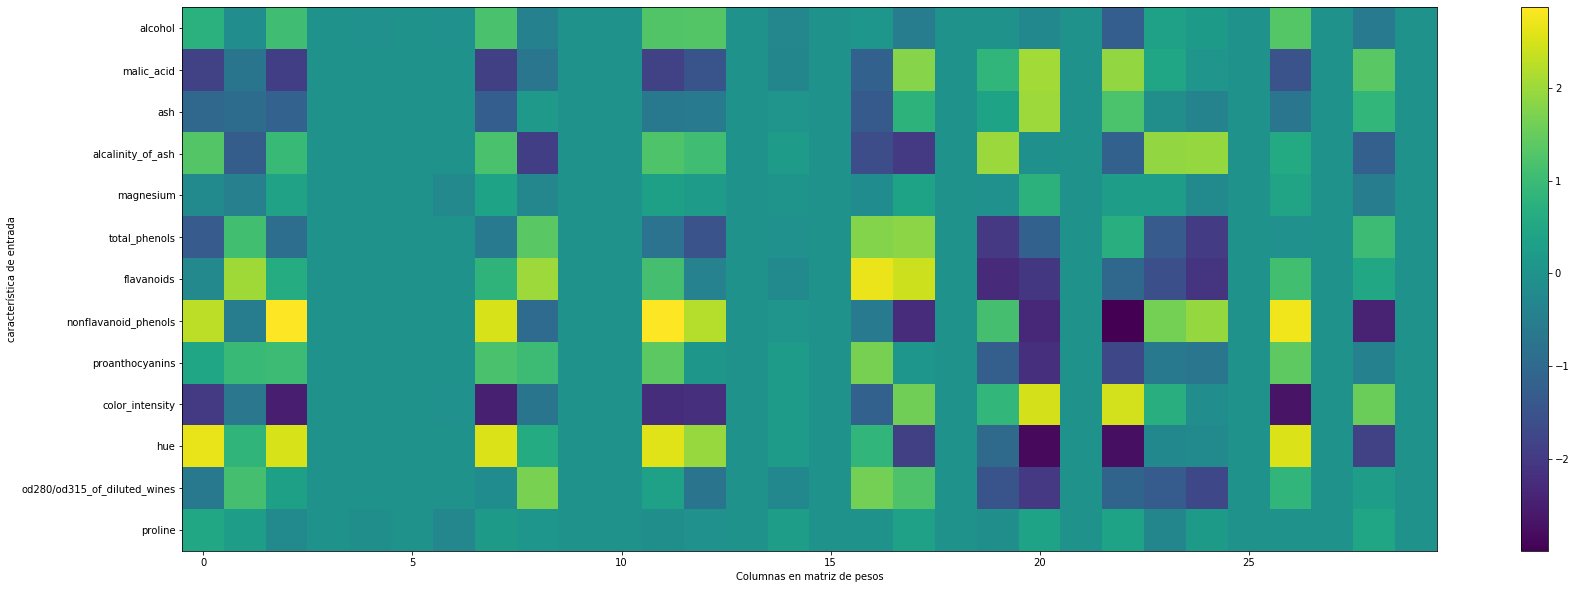

In [42]:
plt.figure(figsize=(30, 10))
plt.imshow(best_model.coefs_[0], interpolation='none')
plt.yticks(range(13), wine.feature_names)
plt.xlabel("Columnas en matriz de pesos")
plt.ylabel("característica de entrada")
plt.colorbar()

Podemos observar que los pesos son mayores para las variables Tono, intensidad de color y Fenoles no flavonoides y lo contrario ocurre con Prolina y Magnesio.
Podemos ver qué ocurre con los pesos de la siguiente capa oculta:

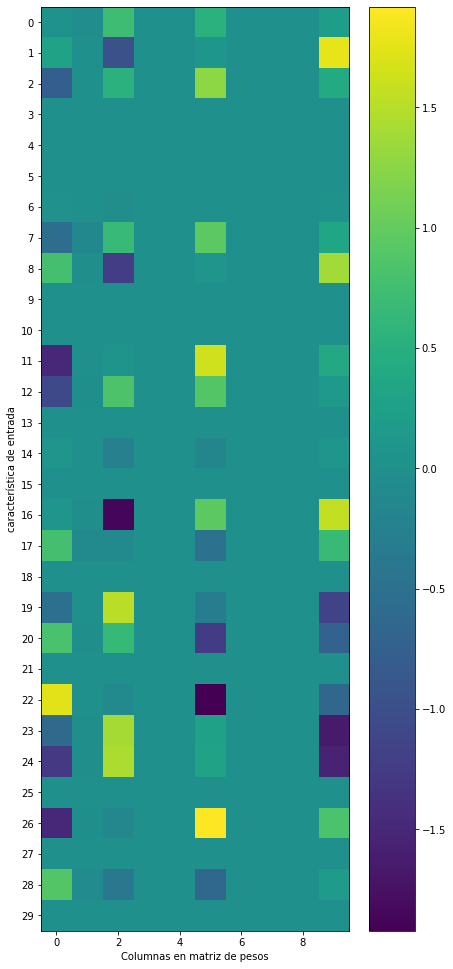

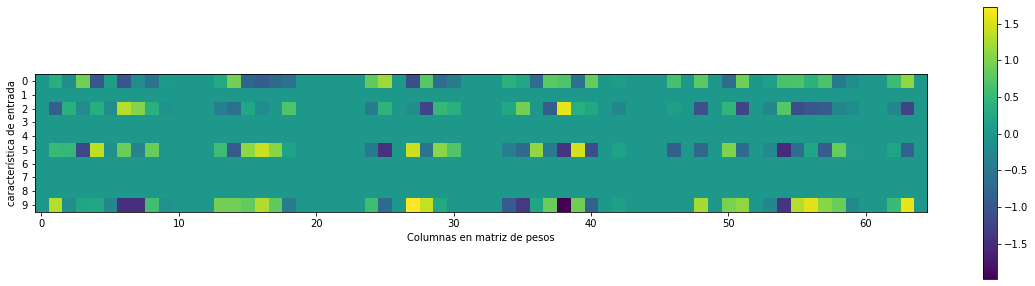

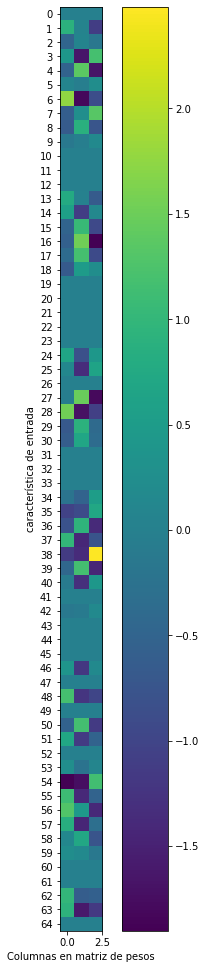

In [43]:
plt.figure(figsize=(7, 17))
plt.imshow(best_model.coefs_[1], interpolation='none')
plt.yticks(range(30))
plt.xlabel("Columnas en matriz de pesos")
plt.ylabel("característica de entrada")
plt.colorbar()
plt.figure(figsize=(20, 5))
plt.imshow(best_model.coefs_[2], interpolation='none')
plt.yticks(range(10))
plt.xlabel("Columnas en matriz de pesos")
plt.ylabel("característica de entrada")
plt.colorbar()
plt.figure(figsize=(7, 17))
plt.imshow(best_model.coefs_[3], interpolation='none')
plt.yticks(range(65))
plt.xlabel("Columnas en matriz de pesos")
plt.ylabel("característica de entrada")
plt.colorbar()

Podemos ver que hay varias unidades en la capa 1 como la 3, 4, 5, 8, 9, 13, 18, 21, 25, 26 y 29 que en un principio no muestran valores significativos mientras que las otras si lo muestran.
Por otro lado, las unidades 0, 2, 5 y 9 tienen pesos significativos de entrada.

Esto se replica en la capa 2 (intermedia). Las unidades 0, 3, 6 y 10 tiene mayor variabilidad y son canal de información a la última capa.

Por último, la capa de 65 unidades condensa mucha información a la salida, aunque se ven algunas relaciones que no juegan un papel relevante o tal vez son las que estabilizan el aprendizaje para lograr el alto rendimiento

Para finalizar, hemos construido distintos modelos usando distintas estrategias indagando si influye el número de capas, la optimización, el factor de aprendizaje, el procesamiento por batch, la función de activación y fuimos tomando decisiones para llegar al mejor modelo.

Logramos construir un modelo que clasifique tres clases de vinos con 13 atributos. El acierto es del 91% y los parámetros obtenidos son:

* Modelo de 3 capas con 30, 10 y 65 unidades
* Función de activación relu
* Factor de aprendizaje constante
* Factor de aprendizaje inicial 0.001
* Sistema de optimización Adam
* Alpha 0.001

Por último, es importante aclarar que el criterio de 65 unidades en la última capa fue el único factor arbitrario en el estudio ya que por intuición si eran 13 características podrían ser 3*13=65 unidades la mejor forma de expandir el conocimiento. Otra estrategia valida hubiera sido probar con unidades múltiplos de 13 en la capa intermedia dejando relu en todo el modelo, pero en la capa de salida usar soft-max con únicamente 13 unidades.
